In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from doe.design import n_ignore_eigvals, get_formula_from_string, logD
import opti

In [7]:
D1 = []
T1 = []

for ndim in [2,3,4,5,6,7,8,9,10,11,12]:
    problem = opti.Problem(
        inputs = opti.Parameters([opti.Continuous(f"x{i+1}", [0, 1]) for i in range(ndim)]),
        outputs = [opti.Continuous("y")],
        constraints = [
            opti.LinearEquality(names=[f"x{i+1}" for i in range(ndim)], rhs=1),
        ]
    )

    model = get_formula_from_string(problem, "fully-quadratic") 

    #append logD
    A = np.round(pd.read_csv(f"results/mcmcdoe_{ndim}.csv", index_col=["index"]),2)
    A = model.get_model_matrix(A).to_numpy()
    D1.append(logD(A, n_ignore_eigvals=n_ignore_eigvals(problem, model)))

    #append T
    t = pd.read_csv(f"results/t_{ndim}.csv", index_col=["index"]).to_numpy()
    T1.append(t[0][0])



In [8]:
D1

[3.1135153092103787,
 0.7951818592481854,
 -4.041100047703287,
 -11.735624942949375,
 -22.03500003572733,
 -34.96347011694657,
 -50.53911955905958,
 -69.06364973117212,
 -89.97288785829873,
 -113.27597697863739,
 -139.8435744095538]

In [9]:
T1

[3.347560405731201,
 12.347336530685425,
 42.48774576187134,
 92.95423793792725,
 306.4494383335113,
 483.6493926048279,
 565.7961688041687,
 1193.8207507133484,
 1791.040209054947,
 3560.662739276886,
 10151.406061410904]

In [25]:
D2 = []
T2 = []

for ndim in [2,3,4,5,6,7,8,9,10,11,12,13,14]:
    problem = opti.Problem(
        inputs = opti.Parameters([opti.Continuous(f"x{i+1}", [0, 1]) for i in range(ndim)]),
        outputs = [opti.Continuous("y")],
        constraints = [
            opti.LinearEquality(names=[f"x{i+1}" for i in range(ndim)], rhs=1),
        ]
    )

    model = get_formula_from_string(problem, "fully-quadratic")

    #append logD
    A = np.round(pd.read_csv(f"results_flexible_doe/mcmcdoe_{ndim}.csv", index_col=["index"]),2)
    A = model.get_model_matrix(A).to_numpy()
    D2.append(logD(A, n_ignore_eigvals=n_ignore_eigvals(problem, model)))

    #append T
    t = pd.read_csv(f"results_flexible_doe/t_{ndim}.csv", index_col=["index"]).to_numpy()
    T2.append(t[0][0])

In [26]:
T2

[540.9986071586609,
 515.8510239124298,
 546.4610228538513,
 650.4227087497711,
 735.0877320766449,
 874.377599477768,
 863.5155534744263,
 1026.0147330760956,
 1353.006196975708,
 2083.0913157463074,
 2694.977400779724,
 2836.8142173290253,
 3008.2413218021397]

In [27]:
D2

[2.6432708360648736,
 0.2535177286134416,
 -5.007406562400235,
 -13.434961518795731,
 -24.22809030895653,
 -38.408652253015724,
 -55.807380564569904,
 -79.05433368355618,
 -102.5352921150365,
 -136.4903381087517,
 -173.69955305510746,
 -219.10951995793377,
 -274.26552502349915]

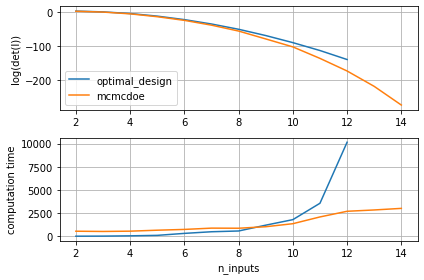

In [41]:
import numpy as np
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 1)
axs[0].plot(np.arange(2, 13), D1, label="optimal_design")
axs[0].plot(np.arange(2, 15), D2, label="mcmcdoe")
axs[0].set_ylabel('log(det(I))')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(np.arange(2, 13),T1)
axs[1].plot(np.arange(2, 15),T2)
axs[1].set_ylabel('computation time')
axs[1].set_xlabel("n_inputs")
axs[1].grid(True)

fig.tight_layout()
plt.savefig("doe_computation_time.png")


234


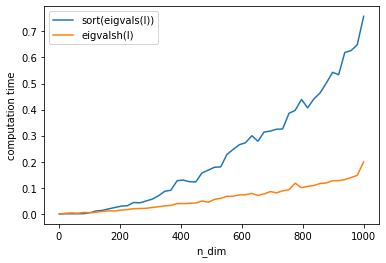

In [39]:
import numpy as np
from scipy.sparse.linalg import eigsh
import time
np.random.seed(1)
ndim = 20
N = int(2*ndim + 4 + ndim * (ndim-1)/2)
print(N)

N = np.linspace(1,1000, dtype=int)
t_eigvals = []
t_eigvalsh = []

for n in N:
    X = np.random.rand(n,n)
    t = time.time()
    np.sort(np.linalg.eigvals(X.T@X))
    t_eigvals.append(time.time()-t)

    t = time.time()
    np.linalg.eigvalsh(X.T@X)
    t_eigvalsh.append(time.time()-t)

plt.figure()
plt.plot(N, t_eigvals, label = "sort(eigvals(I))")
plt.plot(N, t_eigvalsh, label = "eigvalsh(I)")
plt.xlabel("n_dim")
plt.ylabel("computation time")
plt.legend()
plt.savefig("eigvals_computation.png", dpi=150)


In [53]:
import pandas as pd
x = np.array([[[1,2,3],[4,5,6]], [[7,8,9], [10, 11, 12]]])
pd.DataFrame(x, columns=["x1","x2","x3"])

ValueError: Must pass 2-d input. shape=(2, 2, 3)

In [9]:
import opti
from doe.design import get_formula_from_string
import numpy as np
import pandas as pd

problem = opti.Problem(
    inputs = opti.Parameters([opti.Continuous(f"x{i+1}", [0, 1]) for i in range(2)]),
    outputs = [opti.Continuous("y")],
    constraints = [opti.LinearEquality(names=[f"x{i+1}" for i in range(2)], rhs=1)] 
)
model = get_formula_from_string(problem, "fully-quadratic", rhs_only=True)

from doe.design import get_formula_from_string
x = np.array([[[1,2],[3,4],[5,6]],[[1,2],[3,4],[5,6]]])
x = x.reshape(2*3, 2)

x = model.get_model_matrix(pd.DataFrame(x, columns=problem.inputs.names)).to_numpy()

x = x.reshape(2,3,6)
print(x)

np.abs(np.sum(x, axis=2)) - 1e-3



[[[ 1.  1.  1.  2.  4.  2.]
  [ 1.  3.  9.  4. 16. 12.]
  [ 1.  5. 25.  6. 36. 30.]]

 [[ 1.  1.  1.  2.  4.  2.]
  [ 1.  3.  9.  4. 16. 12.]
  [ 1.  5. 25.  6. 36. 30.]]]


array([[  9.999,  43.999, 101.999],
       [  9.999,  43.999, 101.999]])

In [2]:
import cyipopt

ModuleNotFoundError: No module named 'ipopt_wrapper'